In [58]:
require(stringr)
data <- read.csv(file="tmax_data.csv", header=TRUE, sep=",")
head(data)

Date,Station,Tmax,Deaths
1/1/1989,USC00445300,42.08,21
2/1/1989,USC00445300,75.02,11
3/1/1989,USC00445300,53.96,25
4/1/1989,USC00445300,51.98,26
5/1/1989,USC00445300,75.02,14
6/1/1989,USC00445300,93.92,40


In [59]:
data$Year <- str_sub(data$Date,-4,-1)
data$Year <- sapply(data['Year'], as.numeric)
head(data)

Date,Station,Tmax,Deaths,Year
1/1/1989,USC00445300,42.08,21,1989
2/1/1989,USC00445300,75.02,11,1989
3/1/1989,USC00445300,53.96,25,1989
4/1/1989,USC00445300,51.98,26,1989
5/1/1989,USC00445300,75.02,14,1989
6/1/1989,USC00445300,93.92,40,1989


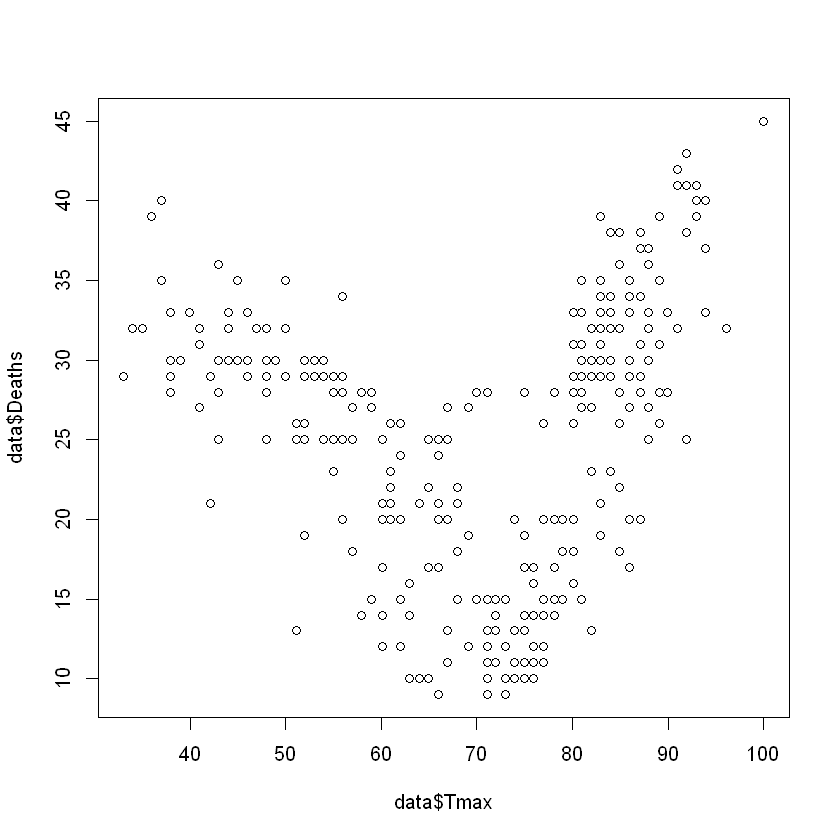

In [60]:
plot(data$Tmax, data$Deaths)

In [65]:
require(mgcv)
m <- gam(Deaths ~ s(Tmax) + s(Year), data=data)
summary(m)



Family: gaussian 
Link function: identity 

Formula:
Deaths ~ s(Tmax) + s(Year)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.6478     0.2787   88.43   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
          edf Ref.df      F  p-value    
s(Tmax) 8.056  8.760 70.878  < 2e-16 ***
s(Year) 7.964  8.713  3.271 0.000624 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.672   Deviance explained = 68.8%
GCV = 26.101  Scale est. = 24.704    n = 318


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 8 iterations.
The RMS GCV score gradient at convergence was 4.305159e-05 .
The Hessian was positive definite.
Model rank =  19 / 19 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

          k'  edf k-index p-value   
s(Tmax) 9.00 8.06    0.95   0.240   
s(Year) 9.00 7.96    0.80   0.005 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


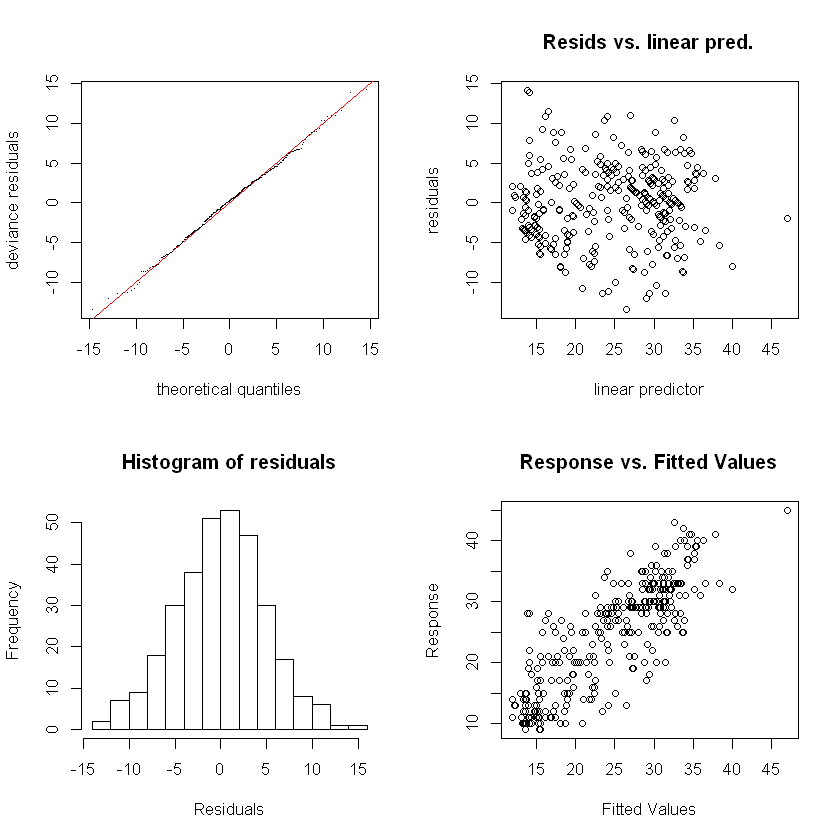

In [62]:
gam.check(m)

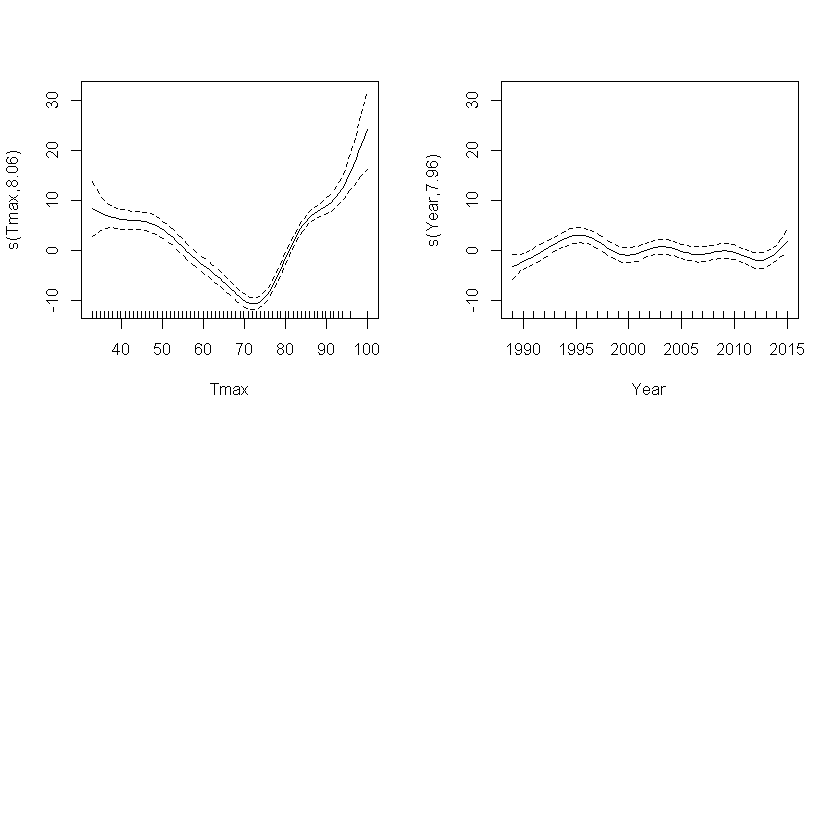

In [72]:
# Good diagnostic to see if smooth function is necessary -- whether or not a straight line can fit through the 95% CI
par(mfrow=c(2, 2))
plot(m)

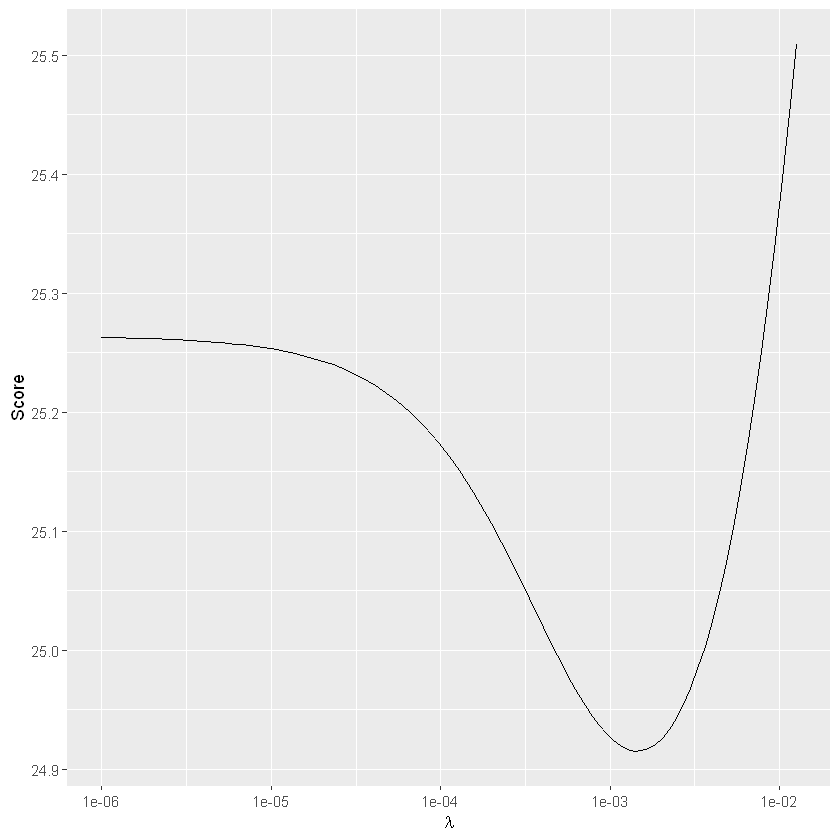

In [75]:
library("mgcv")
library("ggplot2")

## data
set.seed(42)
x <- seq(0, 1, length=500)
y <- sin(2*pi*x)^2 + rnorm(500, sd=0.2)
df <- data.frame(x = x, y = y)

## Generate GCV traces
lambda <- 1e-6
gcv <- numeric(length = 100)

## loop over values of lambda, fixing sp
for (i in seq_along(gcv)) {
    m <- gam(Deaths ~ s(Tmax, k = 20), data = data, method = "GCV.Cp", sp = lambda)
    gcv[i] <- m$gcv.ubre
    lambda <- lambda * 1.1
}

## gather results
res <- data.frame(lambda = 1e-6 * 1.1^{0:99}, gcv = gcv)

## plot
ggplot(res, aes(x = lambda, y = gcv)) +
    geom_line() +
    scale_x_log10() +
    xlab(expression(lambda)) +
    ylab("Score")

In [84]:
summary(m)



Family: gaussian 
Link function: identity 

Formula:
Deaths ~ s(Tmax, k = 20)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.6478     0.2784   88.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
          edf Ref.df     F p-value    
s(Tmax) 9.851  12.09 53.29  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.673   Deviance explained = 68.3%
GCV = 25.509  Scale est. = 24.639    n = 318

In [87]:
print(float(m$sp))

ERROR: Error in float(m$sp): could not find function "float"


In [82]:
require(MASS)
#rgmod <- lm.ridge(Deaths ~ ., data, lambda = seq(0, 5e-8, len=21))

matplot(rgmod$lambda, coef(rgmod), type="l", xlab=expression(lambda), ylab=expression(hat(beta)), col=1)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels
